Name: Tushar Muley

Assignment: Assignment 6-2a

Date:January 9, 2022


##### Assignment 6.2a

Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. 

In [1]:
# get data
from keras.datasets import cifar10
from keras.utils import to_categorical


In [2]:
# library
import pandas as pd
from keras import layers
from keras import models

In [3]:
# breakout data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 14s 0us/step


In [4]:
# check the training data
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
# check the test data
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [8]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [9]:
# preprocess the data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# reserve 10K for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [10]:
# check sample
x_val.shape, y_val.shape

((10000, 32, 32, 3), (10000, 10))

In [11]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val,y_val))

Epoch 1/100
1250/1250 [==============================] - 45s 33ms/step - loss: 1.8359 - accuracy: 0.3269 - val_loss: 1.4621 - val_accuracy: 0.4850
Epoch 2/100
1250/1250 [==============================] - 43s 34ms/step - loss: 1.2246 - accuracy: 0.5634 - val_loss: 1.0588 - val_accuracy: 0.6308
Epoch 3/100
1250/1250 [==============================] - 40s 32ms/step - loss: 1.0348 - accuracy: 0.6326 - val_loss: 1.0182 - val_accuracy: 0.6515
Epoch 4/100
1250/1250 [==============================] - 45s 36ms/step - loss: 0.9155 - accuracy: 0.6751 - val_loss: 1.0605 - val_accuracy: 0.6403
Epoch 5/100
1250/1250 [==============================] - 28s 22ms/step - loss: 0.8219 - accuracy: 0.7108 - val_loss: 0.9920 - val_accuracy: 0.6637
Epoch 6/100
1250/1250 [==============================] - 30s 24ms/step - loss: 0.7485 - accuracy: 0.7379 - val_loss: 1.1147 - val_accuracy: 0.6302
Epoch 7/100
1250/1250 [==============================] - 37s 30ms/step - loss: 0.6865 - accuracy: 0.7629 - val_loss: 1

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

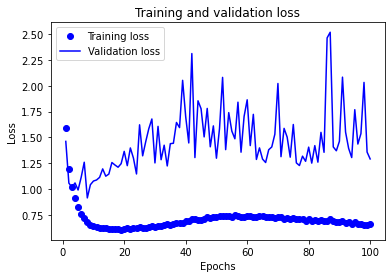

In [14]:
# plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

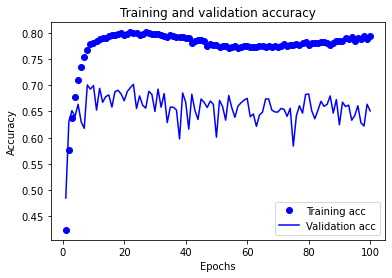

In [15]:
# plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
# retrain the model
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# preprocess the data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)
results = model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 30s 18ms/step - loss: 0.8621 - accuracy: 0.7425
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7850 - accuracy: 0.75360s - loss: 0.7849 - accura
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7789 - accuracy: 0.7581
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7755 - accuracy: 0.7540
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7620 - accuracy: 0.7608
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7477 - accuracy: 0.7637
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7574 - accuracy: 0.7581
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7640 - accuracy: 0.7569
Epoch 9/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7653 - accuracy: 0.7579
Epoch 10/10
313/313 [=================

In [17]:
# print the results
results

[1.4349656105041504, 0.6514999866485596]

In [18]:
# using a trained model to generate predictions on new data
model.predict(x_test)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.0394677e-31, 1.7475647e-31, 4.7103405e-35, ..., 6.9648780e-37,
        2.3962413e-30, 8.8907534e-32],
       [4.8058961e-22, 5.4047130e-22, 2.2406346e-22, ..., 2.4171372e-22,
        6.1508722e-21, 6.1663518e-22],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.2398946e-34, 2.3454804e-36, 5.3544291e-32, ..., 5.3570209e-33,
        9.0837745e-37, 1.8028205e-36],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)